In [2]:
import pandas as pd
import numpy as np

clicks = pd.read_csv('datos/clicks.csv.gzip', compression = 'gzip')
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [3]:
clicks.count()

advertiser_id      26351
action_id              0
source_id          26351
created            26351
country_code       26351
latitude           26351
longitude          26351
wifi_connection    26351
carrier_id         26340
trans_id           26351
os_minor           26339
agent_device        3243
os_major           26339
specs_brand        26351
brand               6235
timeToClick        22977
touchX             23011
touchY             23011
ref_type           26351
ref_hash           26351
dtype: int64

In [4]:
clicks['advertiser_id'].value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

# Distribución de clicks segun su duración en el tiempo

In [5]:
clicks['timeToClick'].head(10)

0     1.563
1       NaN
2       NaN
3    19.013
4    28.110
5       NaN
6       NaN
7       NaN
8     3.129
9     1.707
Name: timeToClick, dtype: float64

In [6]:
clicks['timeToClick'].isnull().sum().sum()

3374

In [7]:
times_filtered = clicks['timeToClick'][clicks['timeToClick'].notnull()]

In [8]:
(times_filtered >= 300).sum()/(times_filtered.count())*100

12.786699743221483

Tomo 5 minutos como el limite maximo para clickear una publicidad. Los mayores los descarto por representar menos del 13%

In [9]:
times_filtered = times_filtered[times_filtered < 300]

Text(0, 0.5, 'Cantidad de clicks')

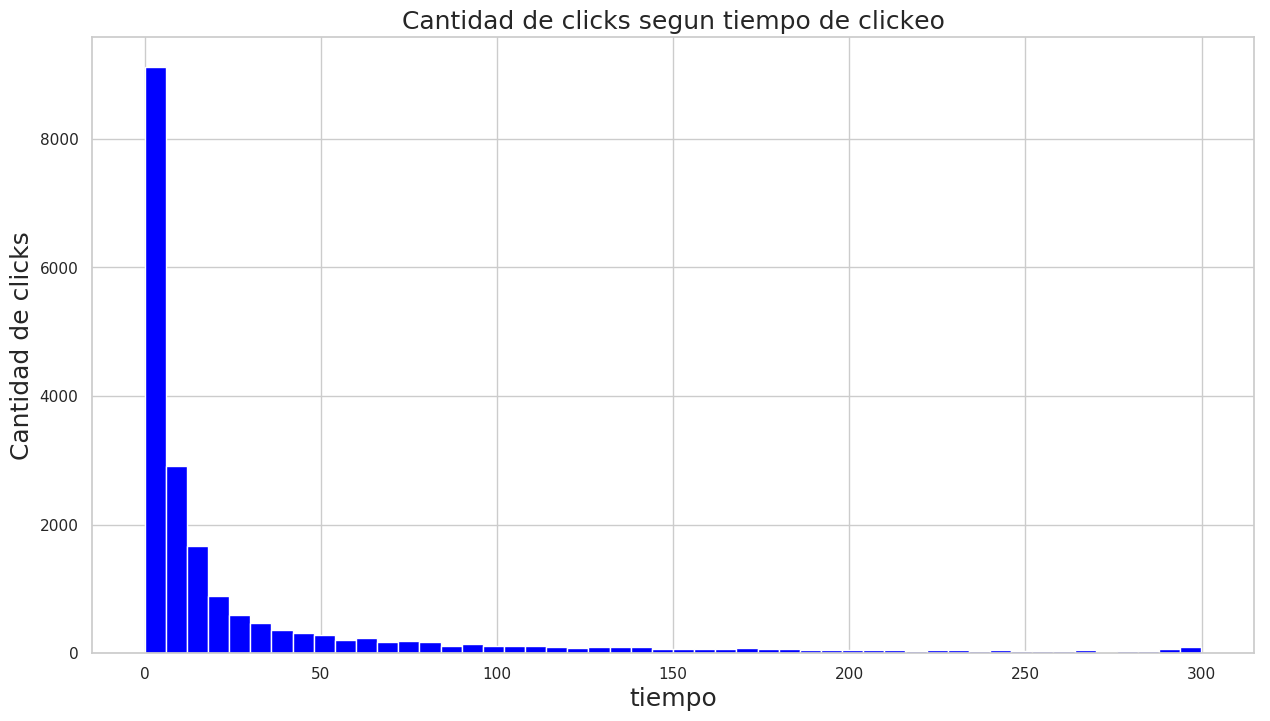

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

times_filtered_graph = times_filtered.plot.hist(bins = 50, color = 'blue', figsize = (15,8))
times_filtered_graph.set_title('Cantidad de clicks segun tiempo de clickeo', fontsize = 18)
times_filtered_graph.set_xlabel('tiempo', fontsize = 18)
times_filtered_graph.set_ylabel('Cantidad de clicks', fontsize = 18)

Es evidente que la mayoria clickea una publicidad en menos de 25 segundos

In [13]:
times_filtered.mean()

32.23662967213915

~32 segundos es el promedio de tiempo para clickear una publicidad

In [15]:
clicks['ref_hash'].nunique()

17119

In [30]:
(clicks['ref_hash'].value_counts() == 1).sum()

12227

Podría calcular el tiempo estimado de click sobre una publicidad de cada usuario? O no tiene mucho sentido? Porque a la gran mayoria de los usuarios les mostre solo una publicidad. Además de que estaría pagando para publilcitarlo para después publicitarlo con esta estadísitica en cuenta...

Me parece que tiene más sentido usar el promedio de todos...

# Tiempo estimado hasta conversion (desde que aparece una publicidad)